Project Title: Predicting Flight Prices Based on Various Criteria

Team Members: Muntasir Billah, Anita Gjurchinovska, Natalie Lollin, Philip Okoth, Emily Washburn

Project Description/Outline: An overall analysis of flight prices will be conducted, followed by a deeper look at the relationship between flight price and several other variables (including date of flight, starting airport, destination airport, duration of flight, etc.).  Based on these findings, further analysis of prices within each of these categories will be conducted as needed. 

# Research Questions to Answer: 
* Which variable/s has/have the strongest association with flight price?

* Which variable/s has/have the weakest association with flight price?

* Can flight price be predicted based on any of these variables?

* Which airports are most expensive to fly to/from?

* Is it cheaper to fly in the am/pm? Hypothesis testing.

* What day is cheapest to fly on?

Datasets to Be Used: https://www.kaggle.com/datasets/dilwong/flightprices 
This dataset is a CSV file where each row is a purchasable ticket found on Expedia between 2022-04-16 and 2022-10-05, to/from the following airports: ATL, DFW, DEN, ORD, LAX, CLT, MIA, JFK, EWR, SFO, DTW, BOS, PHL, LGA, IAD, OAK.
Since the dataset is huge we will only consider one month in our analysis.

# Rough Breakdown of Tasks: 

* Convert csv to dataframe and clean the dataframe.
* Find overall summary statistics for flight price.
* Find summary statistics when grouped by each variable.
* Create data displays; these should include:
* Histogram and/or box plot of all flight prices
* Bar graphs/histograms of the other variables (bar graphs for those that are qualitative, histograms and/or box plots for those that are quantitative)
* Parallel box plots comparing flight prices between departing airports
* Parallel box plots comparing flight prices between arriving airports
* Parallel box plots comparing flight prices comparing flight prices at different times of day (categorize morning, afternoon, night)
* Perform a regression analysis on flight price and any of the quantitative variables:
* Should include: scatter plot, regression equation & r-squared value
* Compare flight price to flight duration (time)
* Compare flight price to travel distance
* Compare flight price to exact time of day

# Written analysis


In [51]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import f_oneway

%matplotlib qt5

In [48]:
# Reference the file where the CSV is located
file = "Resources/final itineraries.csv"

# Import the data into a Pandas DataFrame
original_df = pd.read_csv(file)
original_df.head()

,searchDate,flightDate,startingAirport,destinationAirport,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,departureTime,segmentsArrivalTimeRaw,arrivalTime,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode
0,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,9,947.0,2022-04-17T12:57:00.000-04:00,4/17/2022 12:57,2022-04-17T15:26:00.000-04:00,4/17/2022 15:26,Delta,8940,coach
1,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,4,947.0,2022-04-17T06:30:00.000-04:00,4/17/2022 6:30,2022-04-17T09:00:00.000-04:00,4/17/2022 9:00,Delta,9000,coach
2,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,9,947.0,2022-04-17T11:35:00.000-04:00,4/17/2022 11:35,2022-04-17T14:05:00.000-04:00,4/17/2022 14:05,Delta,9000,coach
3,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,8,947.0,2022-04-17T13:59:00.000-04:00,4/17/2022 13:59,2022-04-17T16:31:00.000-04:00,4/17/2022 16:31,Delta,9120,coach
4,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,9,947.0,2022-04-17T09:59:00.000-04:00,4/17/2022 9:59,2022-04-17T12:33:00.000-04:00,4/17/2022 12:33,Delta,9240,coach


In [3]:
# Drop all rows with missing information
clean_df = original_df.dropna(how='any')
clean_df.count()


searchDate                   289025
flightDate                   289025
startingAirport              289025
destinationAirport           289025
isNonStop                    289025
baseFare                     289025
totalFare                    289025
seatsRemaining               289025
totalTravelDistance          289025
segmentsDepartureTimeRaw     289025
departureTime                289025
segmentsArrivalTimeRaw       289025
arrivalTime                  289025
segmentsAirlineName          289025
segmentsDurationInSeconds    289025
segmentsCabinCode            289025
dtype: int64

In [4]:
# Delete columns

clean_df = clean_df.drop(columns= ["isNonStop", "segmentsDepartureTimeRaw", "segmentsArrivalTimeRaw"], axis=1)
clean_df.head()

,searchDate,flightDate,startingAirport,destinationAirport,baseFare,totalFare,seatsRemaining,totalTravelDistance,departureTime,arrivalTime,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode
0,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 12:57,4/17/2022 15:26,Delta,8940,coach
1,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,4,947.0,4/17/2022 6:30,4/17/2022 9:00,Delta,9000,coach
2,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 11:35,4/17/2022 14:05,Delta,9000,coach
3,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,8,947.0,4/17/2022 13:59,4/17/2022 16:31,Delta,9120,coach
4,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 9:59,4/17/2022 12:33,Delta,9240,coach


In [5]:
# Rename our columns
clean_df = clean_df.rename(columns={'searchDate' : 'Search Date', 'flightDate' : 'Flight Date', 'startingAirport' : 'Departure Airport', 
                                    'destinationAirport' : 'Arrival Airport', "baseFare": "Base Cost", "totalFare" : "Total Cost",
	                                "seatsRemaining" : "Remaining Seats", "totalTravelDistance" : "Total Travel Distance", "departureTime" : "Departure Time", 
	                                "arrivalTime" : "Arrival Time", "segmentsAirlineName": "Airline", "segmentsDurationInSeconds": "Length of Flight (seconds)", 
                                    "segmentsCabinCode" : "Cabin Type"
                                    })
clean_df['Timestamp'] = pd.to_datetime(clean_df['Departure Time']).dt.strftime('%Y-%m-%d %I:%M:%S %p')

clean_df.head()



,Search Date,Flight Date,Departure Airport,Arrival Airport,Base Cost,Total Cost,Remaining Seats,Total Travel Distance,Departure Time,Arrival Time,Airline,Length of Flight (seconds),Cabin Type,Timestamp
0,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 12:57,4/17/2022 15:26,Delta,8940,coach,2022-04-17 12:57:00 PM
1,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,4,947.0,4/17/2022 6:30,4/17/2022 9:00,Delta,9000,coach,2022-04-17 06:30:00 AM
2,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 11:35,4/17/2022 14:05,Delta,9000,coach,2022-04-17 11:35:00 AM
3,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,8,947.0,4/17/2022 13:59,4/17/2022 16:31,Delta,9120,coach,2022-04-17 01:59:00 PM
4,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 9:59,4/17/2022 12:33,Delta,9240,coach,2022-04-17 09:59:00 AM


In [6]:
# Converting data types

clean_df["Search Date"] = pd.to_datetime(clean_df["Search Date"], errors='coerce')
clean_df["Flight Date"] = pd.to_datetime(clean_df["Flight Date"], errors='coerce')
clean_df["Departure Time"] = pd.to_datetime(clean_df["Departure Time"], errors='coerce')
clean_df["Timestamp"] = pd.to_datetime(clean_df["Timestamp"], errors='coerce')
clean_df['AM/PM'] = clean_df['Timestamp'].dt.strftime('%I %p')
clean_df["Day of the week"] = clean_df["Timestamp"].dt.day_name()
clean_df.head()


,Search Date,Flight Date,Departure Airport,Arrival Airport,Base Cost,Total Cost,Remaining Seats,Total Travel Distance,Departure Time,Arrival Time,Airline,Length of Flight (seconds),Cabin Type,Timestamp,AM/PM,Day of the week
0,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 12:57:00,4/17/2022 15:26,Delta,8940,coach,2022-04-17 12:57:00,12 PM,Sunday
1,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,4,947.0,2022-04-17 06:30:00,4/17/2022 9:00,Delta,9000,coach,2022-04-17 06:30:00,06 AM,Sunday
2,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 11:35:00,4/17/2022 14:05,Delta,9000,coach,2022-04-17 11:35:00,11 AM,Sunday
3,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,8,947.0,2022-04-17 13:59:00,4/17/2022 16:31,Delta,9120,coach,2022-04-17 13:59:00,01 PM,Sunday
4,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 09:59:00,4/17/2022 12:33,Delta,9240,coach,2022-04-17 09:59:00,09 AM,Sunday


In [7]:
# Convert dates to date format and compute the number of days between booking and flight day.
clean_df['Date Difference'] = (clean_df['Flight Date'] - clean_df['Search Date']).dt.days

#Convert length of flight from seconds to minutes.
clean_df['Length of Flight (mins)'] = clean_df['Length of Flight (seconds)']/60

clean_df.head()

,Search Date,Flight Date,Departure Airport,Arrival Airport,Base Cost,Total Cost,Remaining Seats,Total Travel Distance,Departure Time,Arrival Time,Airline,Length of Flight (seconds),Cabin Type,Timestamp,AM/PM,Day of the week,Date Difference,Length of Flight (mins)
0,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 12:57:00,4/17/2022 15:26,Delta,8940,coach,2022-04-17 12:57:00,12 PM,Sunday,1.0,149.0
1,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,4,947.0,2022-04-17 06:30:00,4/17/2022 9:00,Delta,9000,coach,2022-04-17 06:30:00,06 AM,Sunday,1.0,150.0
2,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 11:35:00,4/17/2022 14:05,Delta,9000,coach,2022-04-17 11:35:00,11 AM,Sunday,1.0,150.0
3,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,8,947.0,2022-04-17 13:59:00,4/17/2022 16:31,Delta,9120,coach,2022-04-17 13:59:00,01 PM,Sunday,1.0,152.0
4,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 09:59:00,4/17/2022 12:33,Delta,9240,coach,2022-04-17 09:59:00,09 AM,Sunday,1.0,154.0


In [8]:
# Get only the cabin type to coach
clean_df = clean_df.loc[clean_df['Cabin Type'] == 'coach']
clean_df.count()

Search Date                   287772
Flight Date                   287773
Departure Airport             287773
Arrival Airport               287773
Base Cost                     287773
Total Cost                    287773
Remaining Seats               287773
Total Travel Distance         287773
Departure Time                287773
Arrival Time                  287773
Airline                       287773
Length of Flight (seconds)    287773
Cabin Type                    287773
Timestamp                     287773
AM/PM                         287773
Day of the week               287773
Date Difference               287772
Length of Flight (mins)       287773
dtype: int64

In [9]:
# Summary statistics
clean_df.describe()

,Base Cost,Total Cost,Remaining Seats,Total Travel Distance,Length of Flight (seconds),Date Difference,Length of Flight (mins)
count,287773.000000,287773.000000,287773.000000,287773.000000,287773.000000,287772.000000,287773.000000
mean,218.681547,249.590015,6.588665,1087.753267,10962.237249,26.529176,182.703954
std,137.971607,148.326630,2.328760,721.992994,5189.988615,16.584023,86.499810
min,8.720000,23.970000,1.000000,97.000000,2760.000000,1.000000,46.000000
25%,124.650000,148.600000,6.000000,545.000000,7200.000000,11.000000,120.000000
50%,189.770000,217.600000,7.000000,862.000000,9480.000000,26.000000,158.000000
75%,283.720000,319.600000,9.000000,1380.000000,13500.000000,40.000000,225.000000
max,2013.950000,2179.600000,10.000000,2698.000000,26100.000000,60.000000,435.000000


In [10]:
# Summary statistics grouped by departure airport
airline_cost_stats = clean_df.groupby("Airline").agg({"Total Cost": ['min', 'mean', 'median', 'max','var', 'std', 'sem']})
airline_cost_stats


Total Cost                                             \
                         min        mean  median      max           var   
Airline                                                                   
Alaska Airlines        43.60  268.171497  258.60  1162.60  19796.113913   
American Airlines      68.60  254.692735  222.60  2179.60  19921.626825   
Delta                  38.61  248.791907  218.60  1033.60  20093.345788   
Frontier Airlines      23.97  122.450623  111.98   408.99   6110.127057   
JetBlue Airways        38.61  220.112309  188.60  1665.60  23438.677187   
United                 38.61  274.419706  244.60  1528.60  25154.237646   

                                         
                          std       sem  
Airline                                  
Alaska Airlines    140.698664  1.740872  
American Airlines  141.143993  0.446441  
Delta              141.750999  0.550088  
Frontier Airlines   78.167302  1.037355  
JetBlue Airways    153.096954  0.704030  
United             158.600875  0.637373

In [11]:
# Summary statistics grouped by departure airport
departure_cost_stats = clean_df.groupby("Departure Airport").agg({"Total Cost": ['mean', 'median', 'var', 'std', 'sem']})
departure_cost_stats


Total Cost                                            
                         mean  median           var         std       sem
Departure Airport                                                        
ATL                264.412053  233.60  20198.985594  142.123135  0.947867
BOS                205.159906  168.61  19036.445291  137.972625  0.846139
CLT                237.739045  207.11  15468.487676  124.372375  0.928669
DEN                275.408360  254.61  18238.316643  135.049312  1.113035
DFW                258.926269  248.60  13086.630389  114.396811  0.788831
DTW                250.261717  219.60  15598.125760  124.892457  1.087338
EWR                222.596157  197.60  18283.932552  135.218093  0.974205
IAD                263.836020  228.60  23971.224724  154.826434  1.668373
JFK                232.264218  198.60  18713.439878  136.797076  0.937825
LAX                338.556542  323.60  30245.905321  173.913500  1.111433
LGA                162.408784  144.60   5744.372233   75.791637  0.481345
MIA                243.557025  198.60  26184.683455  161.816821  1.186690
OAK                135.195024  133.60   3389.390542   58.218473  2.840771
ORD                230.046320  202.60  13124.352674  114.561567  0.699574
PHL                242.652274  208.61  18324.068224  135.366422  1.347881
SFO                362.852140  343.60  43634.303163  208.888255  1.580357

In [56]:
# Generate a box plot that shows the distrubution of the cost for departure airport.
clean_df.boxplot(column = "Total Cost", by = "Departure Airport", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()

# Save the figure
plt.savefig("Image-Output/BoxplotGroupedByDepartureAirport.png")

In [13]:
# Summary statistics grouped by arrival airport
arrival_cost_stats = clean_df.groupby("Arrival Airport").agg({"Total Cost": ['mean', 'median', 'var', 'std', 'sem']})
arrival_cost_stats



Total Cost                                            
                       mean  median           var         std       sem
Arrival Airport                                                        
ATL              234.260690  198.60  16586.413006  128.788249  0.857769
BOS              240.139529  188.60  29892.824099  172.895414  1.064239
CLT              236.444030  198.60  17492.340035  132.258610  0.989959
DEN              253.305785  238.60  13812.647630  117.527221  0.965318
DFW              227.926411  208.61   9499.619284   97.465990  0.674638
DTW              255.397951  219.60  16921.865864  130.084072  1.132279
EWR              266.534266  228.60  31185.839721  176.595129  1.281324
IAD              276.758588  238.60  26855.763402  163.877282  1.770224
JFK              277.031056  250.60  31697.778162  178.038698  1.236290
LAX              300.344880  286.61  20583.620884  143.469930  0.903453
LGA              188.231353  166.61  12482.257098  111.724022  0.709305
MIA              191.762929  183.60  10427.153079  102.113432  0.742805
OAK              172.522151  168.61   4674.985580   68.373866  3.324451
ORD              230.504239  196.60  13667.378975  116.907566  0.713927
PHL              260.734093  238.60  22335.791096  149.451635  1.491611
SFO              351.595517  329.60  37810.703875  194.449746  1.466262

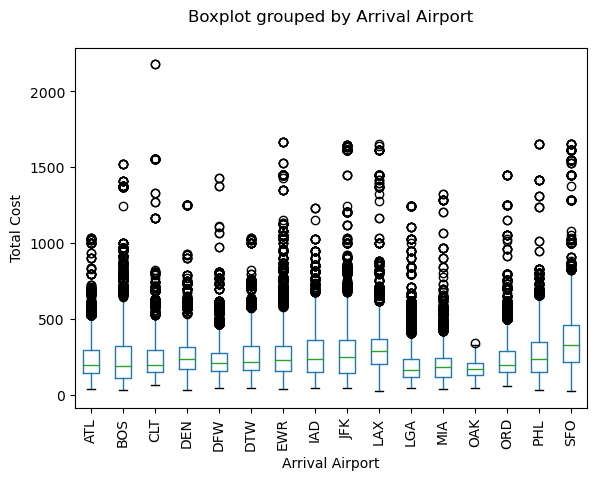

In [14]:
# Generate a box plot that shows the distrubution of the cost for arrival airport.
clean_df.boxplot(column = "Total Cost", by = "Arrival Airport", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()


In [15]:
# Summary statistics grouped by airline
airline_cost_stats = clean_df.groupby("Airline").agg({"Total Cost": ['mean', 'median', 'var', 'std', 'sem']})
airline_cost_stats


Total Cost                                            
                         mean  median           var         std       sem
Airline                                                                  
Alaska Airlines    268.171497  258.60  19796.113913  140.698664  1.740872
American Airlines  254.692735  222.60  19921.626825  141.143993  0.446441
Delta              248.791907  218.60  20093.345788  141.750999  0.550088
Frontier Airlines  122.450623  111.98   6110.127057   78.167302  1.037355
JetBlue Airways    220.112309  188.60  23438.677187  153.096954  0.704030
United             274.419706  244.60  25154.237646  158.600875  0.637373

In [52]:
# Generate a box plot that shows the distrubution of the cost for each airline.
clean_df.boxplot(column = "Total Cost", by = "Airline", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()

# Save the figure
plt.savefig("Image-Output/FBoxplotGroupedByAirline.png")


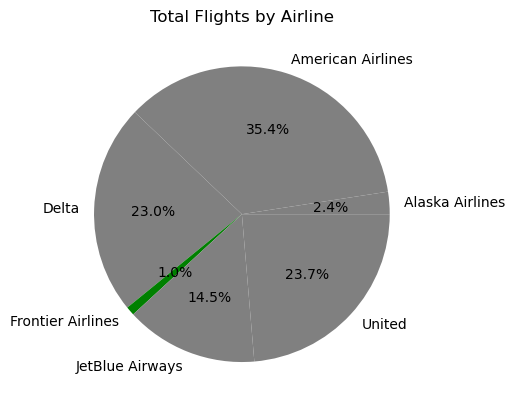

In [47]:
# Group the flights by day of the week and calculate the mean price
grouped = clean_df.groupby("Airline")["Total Cost"].mean()

# Sort the results in ascending order
cheapest_day = grouped.sort_values().index[0]

# Aggregate Total Cost by Day of the week
df_agg = clean_df.groupby("Airline").agg({"Total Cost": "sum"})

# Create a pie chart
colors = ['gray' if (index != cheapest_day) else 'green' for index in df_agg.index]
plt.pie(df_agg["Total Cost"], labels=df_agg.index, colors=colors, autopct="%1.1f%%")
plt.title("Total Flights by Airline")
plt.show()

The r-squared is: 0.2632458093444658


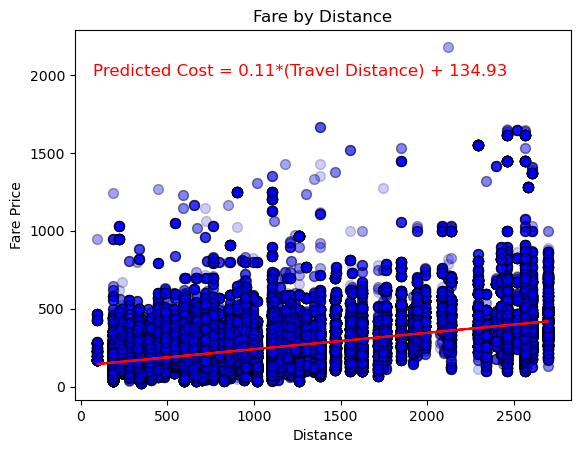

In [17]:
#Scatter plot of Distance vs. Fare prices:
y_values = clean_df['Total Cost']
x_values = clean_df['Total Travel Distance']
plt.scatter(x_values,y_values, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare by Distance')
plt.ylabel('Fare Price')
plt.xlabel('Distance')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "Predicted Cost = " + str(round(slope,2)) + "*(Travel Distance) + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,2000), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.2289020274213952


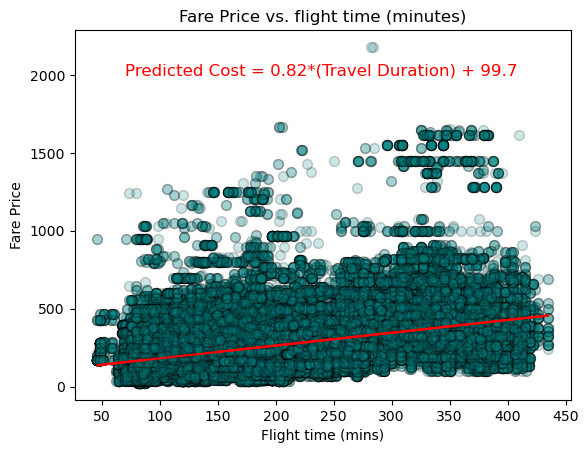

In [18]:

#Scatter plot of flight length vs time:
y_values = clean_df['Total Cost']
x_values = clean_df['Length of Flight (mins)']
plt.scatter(x_values,y_values, c ="teal", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare Price vs. flight time (minutes)')
plt.ylabel('Fare Price')
plt.xlabel('Flight time (mins)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "Predicted Cost = " + str(round(slope,2)) + "*(Travel Duration) + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,2000), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.2642065175476564


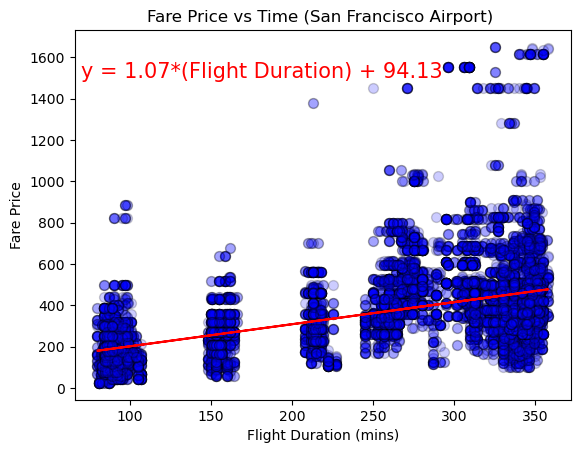

In [19]:
#Scatter plot of variables:
sfo = clean_df.loc[clean_df['Departure Airport']=='SFO']
y_price = sfo['Total Cost']
x_time = sfo['Length of Flight (mins)']
plt.scatter(x_time, y_price, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare Price vs Time (San Francisco Airport) ')
plt.ylabel('Fare Price')
plt.xlabel('Flight Duration (mins)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_time, y_price)
regress_values = x_time * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "*(Flight Duration) + " + str(round(intercept,2))
correlation = st.pearsonr(x_time, y_price)
plt.plot(x_time,regress_values,"r-")
plt.annotate(line_eq,(70,1500), fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.010211732692570096


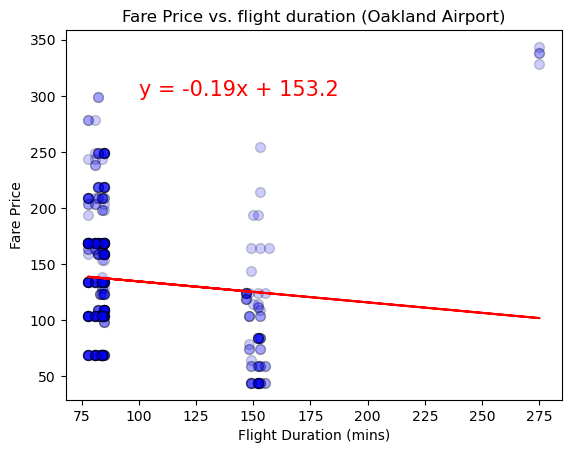

In [20]:
#Scatter plot of variables:
oak = clean_df.loc[clean_df['Departure Airport']=='OAK']
y_oak = oak['Total Cost']
x_oak = oak['Length of Flight (mins)']
plt.scatter(x_oak, y_oak, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare Price vs. flight duration (Oakland Airport)')
plt.ylabel('Fare Price')
plt.xlabel('Flight Duration (mins)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_oak, y_oak)
regress_values = x_oak * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_oak, y_oak)
plt.plot(x_oak,regress_values,"r-")
plt.annotate(line_eq,(100,300), fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [54]:
#Scatter plot of fare price vs duration after booking:
y_values = clean_df['Total Cost']
x_values = clean_df['Date Difference']
plt.scatter(x_values, y_values, c ="aqua", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.6)
plt.title('Fare by flight time')
plt.ylabel('Fare Price')
plt.xlabel('Days before flight')
plt.show()

# Save the figure
plt.savefig("Image-Output/FareByFlightTime.png")


In [59]:
# Histogram and/or box plot of all flight prices
bins = [0, 99.9, 199.9, 299.9, 399.9, 499.9, 599.9, 699.9, 799.9, 899.9, 999.9, 1599.9, 1999.9, 2999.9, 3999.9]
fig, axs = plt.subplots(1, 1, figsize =(6, 4), tight_layout = True)
plt.hist(clean_df['Total Cost'], bins= bins, alpha=0.6)
plt.title('Total Fare Price ($)')
plt.xlabel('Fare Price')
plt.ylabel('Count of Price')
plt.show()

plt.savefig('Image-Output/HistogramPrice.png')

In [58]:
# Histograms of the Fare Price by airline.
alsk = clean_df.loc[clean_df['Airline']=='Alaska Airlines']
aa = clean_df.loc[clean_df['Airline']=='American Airlines']
delt = clean_df.loc[clean_df['Airline']=='Delta']
fro = clean_df.loc[clean_df['Airline']=='Frontier Airlines']
jet = clean_df.loc[clean_df['Airline']=='JetBlue Airways']
uni = clean_df.loc[clean_df['Airline']=='United']
bins = [0, 99.9, 199.9, 299.9, 399.9, 499.9, 599.9, 699.9, 799.9, 899.9]#, 999.9, 1599.9, 1999.9, 2999.9, 3999.9]
fig, axs = plt.subplots(1, 1, figsize =(6, 4), tight_layout = True)
plt.hist(alsk['Total Cost'], bins= bins, alpha=0.5, color='blue', label='Alaska')
plt.hist(aa['Total Cost'], bins= bins, alpha=0.5, color='navy', label='American')
plt.hist(fro['Total Cost'], bins= bins, alpha=0.5, color='red', label='Frontier')
plt.hist(jet['Total Cost'], bins= bins, alpha=0.5, color='magenta', label='JetBlue')
plt.hist(uni['Total Cost'], bins= bins, alpha=0.5, color='green', label='United')
plt.hist(delt['Total Cost'], bins= bins, alpha=0.5, color='yellow', label='Delta')
plt.title('Total Fare Price ($)')
plt.legend(loc='upper right')
plt.xlabel('Fare Price')
plt.ylabel('Count of Price')
plt.show()
plt.savefig('Image-Output/FarePriceByAirline.png')

In [24]:
am_pm_stats = clean_df.groupby("AM/PM").agg({"Total Cost": ['min', 'mean', 'median', 'max','var', 'std', 'sem']})
am_pm_stats

Total Cost                                                         \
             min        mean  median      max           var         std   
AM/PM                                                                     
01 AM     188.60  341.374059  333.60   593.60   4998.921658   70.703053   
01 PM      33.97  263.689096  231.60  1634.59  21806.971283  147.671836   
02 PM      23.97  246.329426  218.60  1665.60  18543.405112  136.174172   
03 PM      23.97  254.224828  232.60  1448.60  19555.260143  139.840124   
04 PM      23.97  250.171239  218.60  1654.60  22249.784797  149.163618   
05 AM      35.97  219.549841  191.60  1551.60  17680.794903  132.969150   
05 PM      23.97  256.459125  228.60  1614.60  21267.488696  145.833771   
06 AM      35.97  211.555108  183.60  1644.60  17332.833530  131.654220   
06 PM      35.97  239.678936  208.61  1614.60  18334.603204  135.405329   
07 AM      35.97  230.021213  195.60  2179.60  19051.900130  138.028621   
07 PM      33.97  222.112461  198.60  1367.60  16602.751530  128.851665   
08 AM      35.97  272.607291  233.60  1649.60  30201.084042  173.784591   
08 PM      33.97  218.215201  194.60  1639.60  14114.735504  118.805452   
09 AM      33.97  248.333945  208.61  1644.60  21457.731253  146.484577   
09 PM      35.97  240.070922  208.61  1448.60  18633.379029  136.504136   
10 AM      35.97  263.860453  238.60  1665.60  22236.825324  149.120171   
10 PM      35.97  283.788699  253.80  1614.60  33456.157578  182.910245   
11 AM      33.97  265.593029  228.60  2179.60  28498.850347  168.816025   
11 PM      68.60  333.104059  328.60  1614.60  20689.875764  143.839757   
12 AM      58.99  221.983750  194.60   697.10  14393.631977  119.973464   
12 PM      33.98  270.916288  240.60  1649.60  25526.625927  159.770541   

                 
            sem  
AM/PM            
01 AM  7.035217  
01 PM  1.113530  
02 PM  1.098357  
03 PM  1.145692  
04 PM  1.191518  
05 AM  1.873734  
05 PM  1.071699  
06 AM  0.918640  
06 PM  1.001766  
07 AM  0.922304  
07 PM  1.095866  
08 AM  1.142677  
08 PM  1.058613  
09 AM  1.210534  
09 PM  1.407409  
10 AM  1.056156  
10 PM  2.151885  
11 AM  1.343241  
11 PM  2.173411  
12 AM  3.623931  
12 PM  1.212822

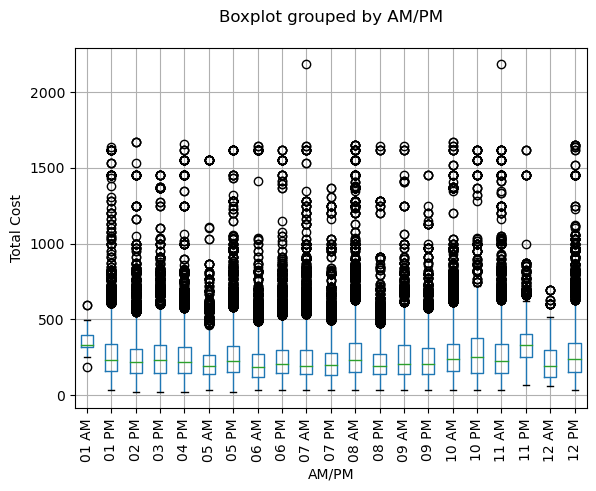

In [25]:
# Parallel box plots comparing flight prices comparing flight prices at different times of day (categorize morning, afternoon, night)
clean_df.boxplot(column = "Total Cost", by = "AM/PM", grid = True)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()


In [26]:
day_of_the_week_stats = clean_df.groupby("Day of the week").agg({"Total Cost": ['min', 'mean', 'median', 'max','var', 'std', 'sem']})
day_of_the_week_stats

Total Cost                                            \
                       min        mean  median     max           var   
Day of the week                                                        
Friday               33.97  255.799282  228.60  1639.6  18430.127354   
Monday               23.97  266.724001  239.35  2179.6  23729.655003   
Saturday             23.97  244.627803  204.10  1649.6  23453.997891   
Sunday               35.97  305.866404  268.60  1665.6  29948.220935   
Thursday             23.97  251.866010  219.60  1649.6  19314.192000   
Tuesday              23.97  212.050735  181.60  1614.6  17069.914613   
Wednesday            23.97  212.541420  183.60  1649.6  16662.147319   

                                       
                        std       sem  
Day of the week                        
Friday           135.757605  0.668036  
Monday           154.044328  0.740906  
Saturday         153.146981  0.833861  
Sunday           173.055543  0.863875  
Thursday         138.975509  0.663181  
Tuesday          130.651883  0.624757  
Wednesday        129.081940  0.631829

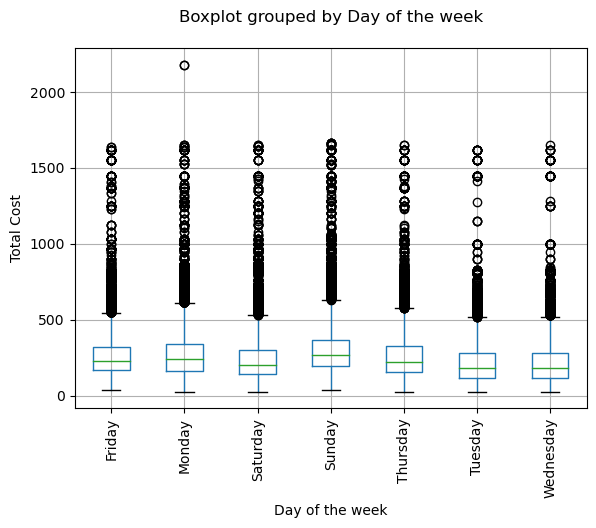

In [27]:
# Parallel box plots comparing flight prices comparing flight prices at different times of day (categorize morning, afternoon, night)
clean_df.boxplot(column = "Total Cost", by = "Day of the week", grid = True)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()


In [57]:
# Group the flights by day of the week and calculate the mean price
grouped = clean_df.groupby("Day of the week")["Total Cost"].mean()

# Sort the results in ascending order
cheapest_day = grouped.sort_values().index[0]

# Aggregate Total Cost by Day of the week
df_agg = clean_df.groupby("Day of the week").agg({"Total Cost": "sum"})

# Create a pie chart
colors = ['gray' if (index != cheapest_day) else 'green' for index in df_agg.index]
plt.pie(df_agg["Total Cost"], labels=df_agg.index, colors=colors, autopct="%1.1f%%")
plt.title("Total Flights by Day of the Week")
plt.show()
plt.savefig('Image-Output/CheapestDayToFly.png')

In [28]:
# Group the flights by day of the week and calculate the mean price
grouped = clean_df.groupby("Day of the week")["Total Cost"].mean()

# Sort the results in ascending order
cheapest_day = grouped.sort_values().index[0]

print(f"The cheapest day to fly is {cheapest_day}.")


The cheapest day to fly is Tuesday.


In [29]:
# One-way ANOVA to compare Fare price at departing airports
alaska = clean_df.loc[clean_df['Airline']=='Alaska Airlines', 'Total Cost']
american = clean_df.loc[clean_df['Airline']=='American Airlines', 'Total Cost']
delta = clean_df.loc[clean_df['Airline']=='Delta', 'Total Cost']
frontier = clean_df.loc[clean_df['Airline']=='Frontier Airlines', 'Total Cost']
jet = clean_df.loc[clean_df['Airline']=='JetBlue Airways', 'Total Cost']
united = clean_df.loc[clean_df['Airline']=='United', 'Total Cost']

f_oneway(alaska, american, delta, united, jet, frontier)

F_onewayResult(statistic=1645.141657156286, pvalue=0.0)

In [30]:

# Calculate correlation coefficients
corr_matrix = clean_df[['Total Cost', 'Total Travel Distance', 'Length of Flight (seconds)']].corr()
corr_matrix

# Print correlation coefficients with respect to flight_price
print(corr_matrix['Total Cost'])


Total Cost                    1.000000
Total Travel Distance         0.513075
Length of Flight (seconds)    0.478437
Name: Total Cost, dtype: float64


In [36]:
# One-way ANOVA to compare Fare price between week days
mon = clean_df.loc[clean_df['Day of the week']=='Monday']['Total Cost']
tue = clean_df.loc[clean_df['Day of the week']=='Tuesday']['Total Cost']
wed = clean_df.loc[clean_df['Day of the week']=='Wednesday']['Total Cost']
thu = clean_df.loc[clean_df['Day of the week']=='Thursday']['Total Cost']
fri = clean_df.loc[clean_df['Day of the week']=='Friday']['Total Cost']
sat = clean_df.loc[clean_df['Day of the week']=='Saturday']['Total Cost']
sun = clean_df.loc[clean_df['Day of the week']=='Sunday']['Total Cost']
st.f_oneway(mon, tue, wed, thu, fri, sat, sun)


F_onewayResult(statistic=2065.071885306883, pvalue=0.0)